<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Financial_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using RSI(Relative Strength Index) As A Trading Strategy 

---



---



In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [7]:
# Load the data into a dataframe and view the first five rows
df = pd.read_csv('FB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,195.190002,196.679993,193.639999,195.759995,195.759995,9723900
1,2019-07-09,194.970001,199.460007,194.889999,199.210007,199.210007,14698600
2,2019-07-10,200.000000,202.960007,199.669998,202.729996,202.729996,20571700
3,2019-07-11,203.259995,203.800003,200.210007,201.229996,201.229996,13678500
4,2019-07-12,199.679993,205.300003,199.160004,204.869995,204.869995,15366300


In [8]:
# Get the number of rows and columns 
df.shape

(251, 7)

In [12]:
# Set the date as the index for the data
import datetime
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-07-08,2019-07-08,195.190002,196.679993,193.639999,195.759995,195.759995,9723900
2019-07-09,2019-07-09,194.970001,199.460007,194.889999,199.210007,199.210007,14698600
2019-07-10,2019-07-10,200.000000,202.960007,199.669998,202.729996,202.729996,20571700
2019-07-11,2019-07-11,203.259995,203.800003,200.210007,201.229996,201.229996,13678500
2019-07-12,2019-07-12,199.679993,205.300003,199.160004,204.869995,204.869995,15366300
...,...,...,...,...,...,...,...
2020-06-26,2020-06-26,232.639999,233.089996,215.399994,216.080002,216.080002,76343900
2020-06-29,2020-06-29,209.750000,220.750000,207.110001,220.639999,220.639999,58514300
2020-06-30,2020-06-30,220.589996,227.500000,218.470001,227.070007,227.070007,33927100
2020-07-01,2020-07-01,228.500000,239.000000,227.559998,237.550003,237.550003,43399700


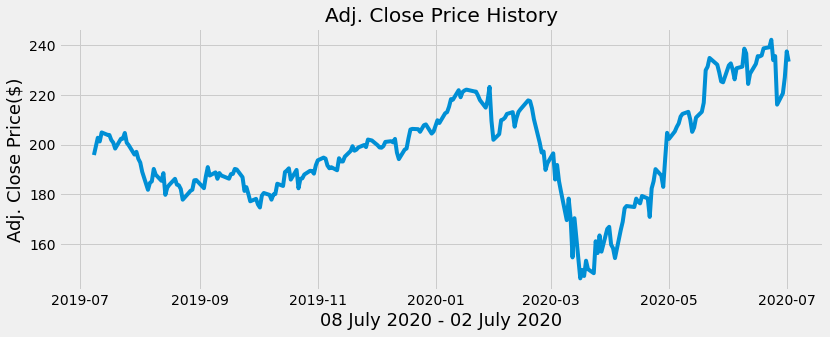

In [15]:
# Visualize the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('08 July 2020 - 02 July 2020', fontsize= 18)
plt.ylabel('Adj. Close Price($)', fontsize= 18) 
plt.show()

In [16]:
# Prepare the data to calculate the RSI 

# Get the difference in price from the previous day
delta = df['Adj Close'].diff(1)
delta

2019-07-08          NaN
2019-07-09     3.450012
2019-07-10     3.519989
2019-07-11    -1.500000
2019-07-12     3.639999
                ...    
2020-06-26   -19.599991
2020-06-29     4.559997
2020-06-30     6.430008
2020-07-01    10.479996
2020-07-02    -4.130005
Name: Adj Close, Length: 251, dtype: float64

In [17]:
# Get rid of null/missing values
delta = delta.dropna()
delta

2019-07-09     3.450012
2019-07-10     3.519989
2019-07-11    -1.500000
2019-07-12     3.639999
2019-07-15    -0.959991
                ...    
2020-06-26   -19.599991
2020-06-29     4.559997
2020-06-30     6.430008
2020-07-01    10.479996
2020-07-02    -4.130005
Name: Adj Close, Length: 250, dtype: float64

In [19]:
# Get the positive gains(up) and negative gains(down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [20]:
# Get the time period 
period = 14 

# Calculate the average gain and average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [21]:
# Calculate the RSI 


# Calculate the Relative Strength(RS)
RS = AVG_Gain / AVG_Loss

# Calculative the Relative Strength Index(RSI)
RSI = 100.0 - (100.0 / (1.0 / RS ))

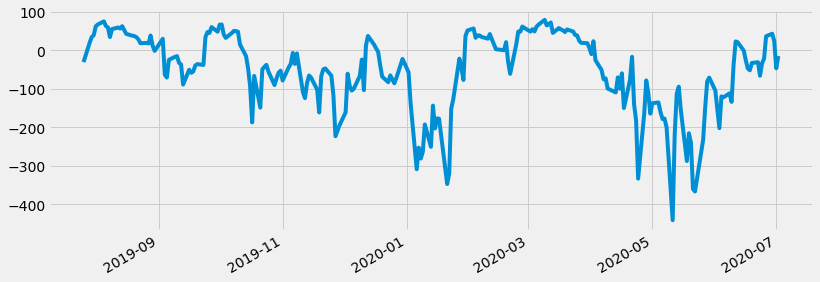

In [22]:
# Visualize the RSI 
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [23]:
# Put all the data together 

# Create a new DataFrame
new_df = pd.DataFrame()
new_df['Adj Close Price'] = df['Adj Close']
new_df['RSI'] = RSI 
new_df

,Adj Close Price,RSI
2019-07-08,195.759995,NaN
2019-07-09,199.210007,NaN
2019-07-10,202.729996,NaN
2019-07-11,201.229996,NaN
2019-07-12,204.869995,NaN
...,...,...
2020-06-26,216.080002,36.320519
2020-06-29,220.639999,42.745383
2020-06-30,227.070007,24.005943
2020-07-01,237.550003,-46.957824


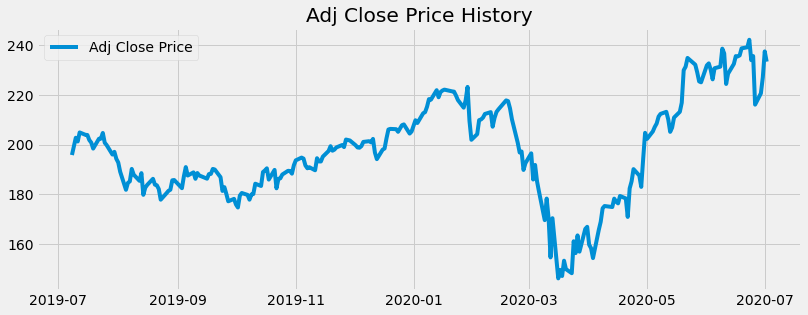

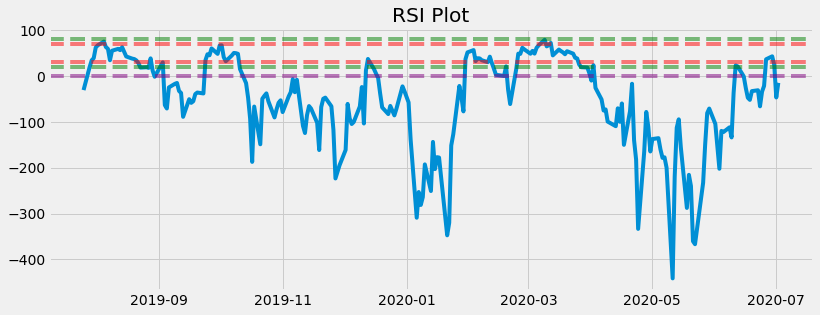

In [28]:
# Visualize the Adj. Close Price and RSI 

# Plot the Adj. Close Price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values, loc= 'upper left')
plt.show()

# Plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['RSI'])
plt.title('RSI Plot')
plt.axhline(0, linestyle= '--', alpha = 0.5, color= 'purple')
plt.axhline(20, linestyle= '--', alpha = 0.5, color= 'green')
plt.axhline(30, linestyle= '--', alpha = 0.5, color= 'red')
plt.axhline(70, linestyle= '--', alpha = 0.5, color= 'red')
plt.axhline(80, linestyle= '--', alpha = 0.5, color= 'green')

plt.show()

**Analysis**

---



---



The RSI indicates that in March 2020, the stock was over-sold, which represents a good buying opportunity for an investor. As seen in the Adj. Close Price figure, you would've bought the stock for under $160 in March and would've doubled your investment by June 2020.